<center> Exercice de programmation 1 : Régression linéaire</center>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#### Régression linéaire avec une seule variable

In [14]:
columns = ['population', 'profit']
ex1_df = pd.read_csv('data/TP2/ex1data1.txt', names=columns)

ex1_df.head(3)

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620


Text(0.5, 1.0, 'Scatter plot of training data')

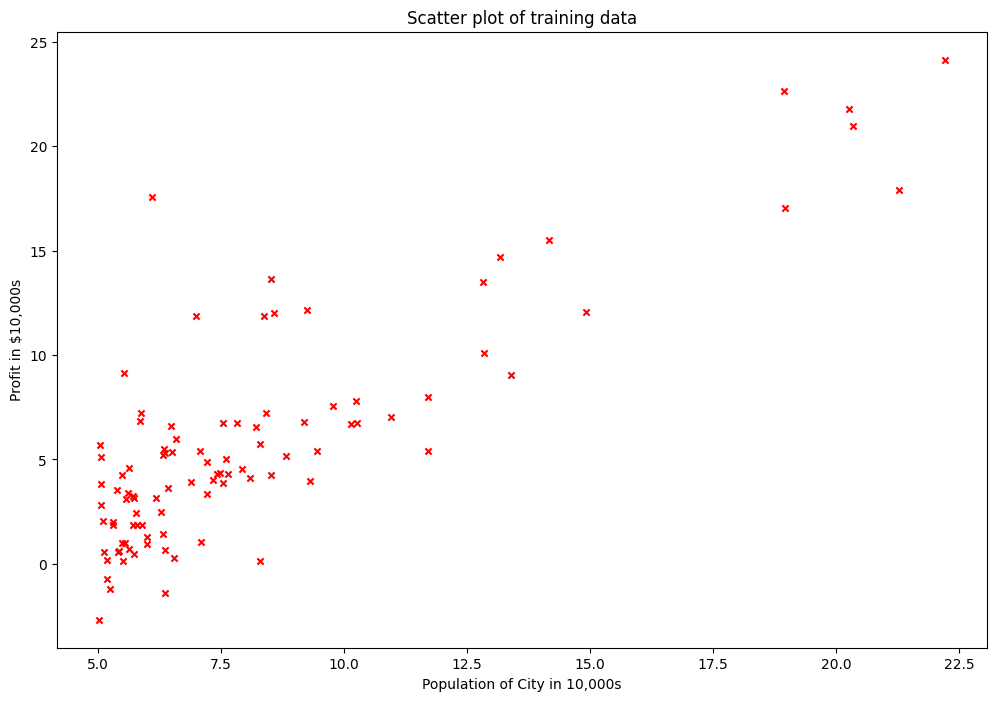

In [15]:
ex1_df.plot(kind='scatter', x='population', y='profit', figsize=(12,8), color='red', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

In [16]:
X = ex1_df['population']
Y = ex1_df['profit']

In [17]:
def predict(X, theta):
    return X.dot(theta)

def gradient_descent(X, Y, alpha, num_iterations):
    
    # add a column of ones to the data
    X = np.c_[X, np.ones(X.shape[0])]

    m, n = X.shape
   
    # initialize the parameters
    theta = np.zeros(n)
    cost_history = []
    

    for _ in range(num_iterations):

        predictions = predict(X, theta) 
        theta = theta - alpha * (1/m) * (X.T.dot(predictions - Y))      
        
        cost = (1/(2*m)) * np.sum(np.square(predictions - Y))

        cost_history.append(cost)

    print(f"theta: {theta}", f"cost: {cost_history[-1]:.2f}")
    return theta, cost_history

theta, cost_history = gradient_descent(X, Y, 0.01, 20)


theta: [ 0.80780498 -0.06116598] cost: 5.82


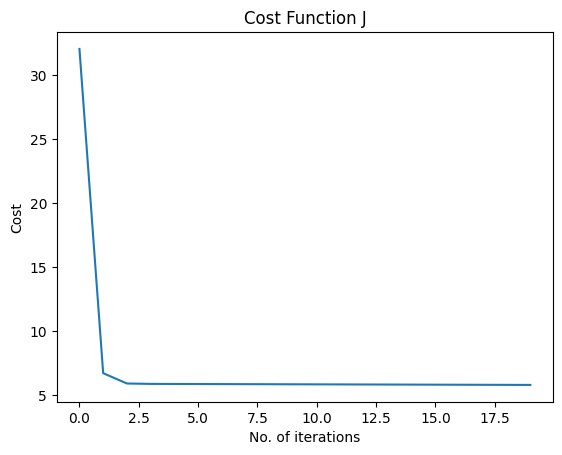

In [18]:
# plot the learning curve  
plt.plot(cost_history)
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

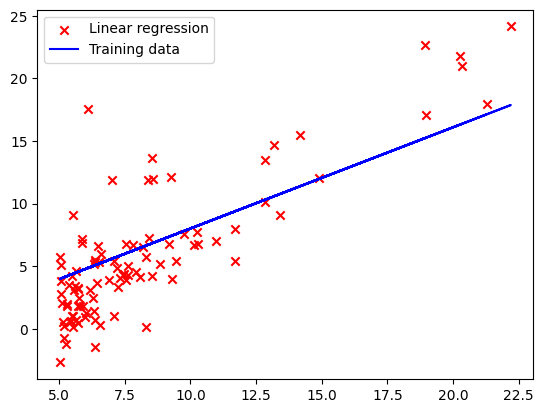

In [19]:
# plot the linear model
predictions = predict(np.c_[X, np.ones(X.shape[0])], theta)
plt.scatter(X, Y, color='red', marker='x')
plt.plot(X, predictions, color='blue')
plt.legend(['Linear regression', 'Training data'])
plt.show()

#### Régression linéaire avec variables multiple

In [20]:
columns = ['taille','nbr_chambre', 'prix']
ex2_df = pd.read_csv('data/TP2/ex1data2.txt', names=columns)

ex2_df.head(3)

,taille,nbr_chambre,prix
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000


#### normalisation

In [21]:
for column in ex2_df.columns:
    ex2_df[column] = (ex2_df[column] - ex2_df[column].mean()) / ex2_df[column].std()

ex2_df.head(3)
    

,taille,nbr_chambre,prix
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626


In [22]:
X = ex2_df[['taille', 'nbr_chambre']]

Y = ex2_df['prix']

theta, cost_history = gradient_descent(X, Y, 0.01, 100)



theta: [ 4.90915551e-01  1.62136650e-01 -8.27706698e-17] cost: 0.18


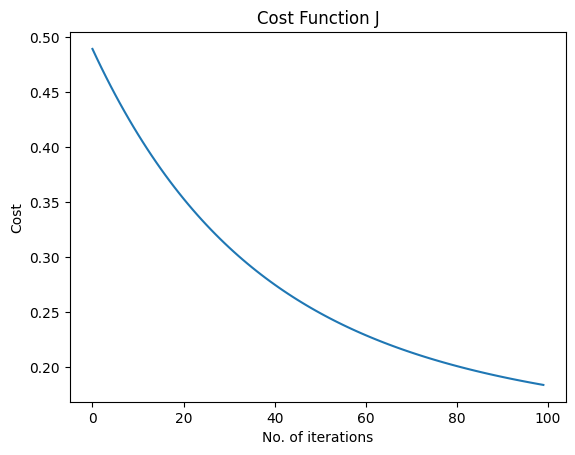

In [23]:

plt.plot(cost_history)
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

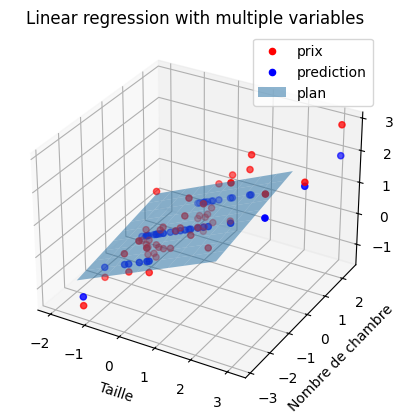

In [24]:
predictions = predict(np.c_[X, np.ones(X.shape[0])], theta)

# show a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['taille'], X['nbr_chambre'], Y, color='red')
ax.scatter(X['taille'], X['nbr_chambre'], predictions, color='blue')
ax.set_xlabel('Taille')
ax.set_ylabel('Nombre de chambre')
ax.set_zlabel('Prix')

ax.title.set_text('Linear regression with multiple variables')
# show the predicted plane
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
x, y = np.meshgrid(x, y)
z = theta[0]*x + theta[1]*y + theta[2]
ax.plot_surface(x, y, z, alpha=0.5)
ax.legend(['prix', 'prediction', 'plan'])
plt.show()